In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set_style('darkgrid')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


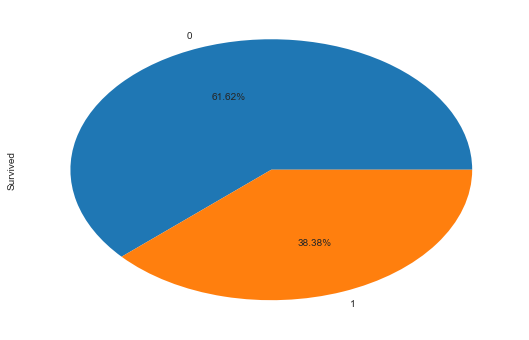

In [14]:
train_data['Survived'].value_counts().plot(kind='pie', autopct='%1.2f%%');

## 补全数据
将`Embarked`这一栏缺失的值用最多的一个值来代替

In [20]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values

将`Cabin`这一栏缺失的值用`U0`来代替，代表Unknown

In [23]:
train_data.Cabin = train_data.Cabin.fillna('U0')

将Age这一栏缺失的值利用回归算法得出的值替代，这里用随机森林做回归算法的模型

In [30]:
from sklearn.ensemble import RandomForestRegressor

age_df = train_data[['Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']]
age_notnull = age_df.loc[(train_data['Age'].notnull())]
age_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_notnull.values[:, 1:]
y = age_notnull.values[:, 0]
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X, y)
predict_ages = RFR.predict(age_isnull.values[:, 1:])
train_data.loc[train_data.Age.isnull(), ['Age']] = predict_ages

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 分析数据

In [40]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

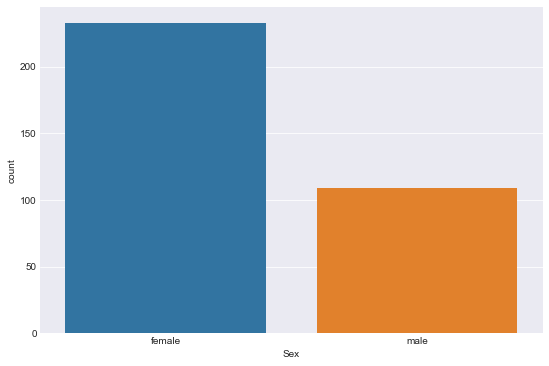

In [43]:
sns.countplot('Sex', data=train_data[train_data.Survived == 1]);

In [44]:
train_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

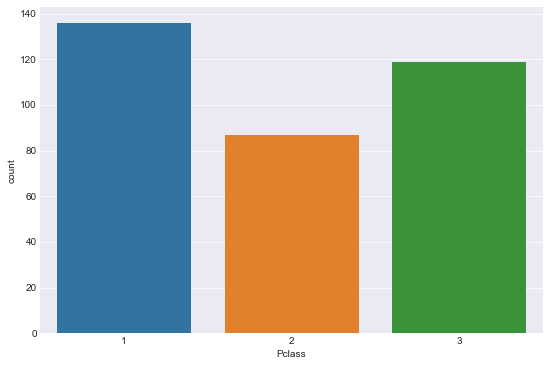

In [46]:
sns.countplot('Pclass', data=train_data[train_data.Survived == 1]);